<a href="https://colab.research.google.com/github/vardhamansankarc/DataTrained_Fliprobo_practice_projects/blob/main/Projects_Evaluation_2nd_Phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# pip install pandas scikit-learn matplotlib seaborn
# !pip install -U scikit-learn
import sklearn
print(sklearn.__version__)


1.3.2


Global Power Plant Database

<ipython-input-15-24d92ffc9333>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


       country  country_long        name   gppd_idnr  capacity_mw    latitude  \
count    907.0         907.0  907.000000  907.000000   907.000000  907.000000   
mean       0.0           0.0  453.000000  453.000000   326.223755   21.197918   
std        0.0           0.0  261.972645  261.972645   590.085456    6.079148   
min        0.0           0.0    0.000000    0.000000     0.000000    8.168900   
25%        0.0           0.0  226.500000  226.500000    16.725000   17.072000   
50%        0.0           0.0  453.000000  453.000000    59.200000   21.281800   
75%        0.0           0.0  679.500000  679.500000   385.250000   25.176450   
max        0.0           0.0  906.000000  906.000000  4760.000000   34.649000   

        longitude  primary_fuel  other_fuel1  other_fuel2  ...  \
count  907.000000    907.000000   907.000000        907.0  ...   
mean    77.464907      3.206174     1.995590          0.0  ...   
std      4.812291      2.280652     0.081259          0.0  ...   
min   

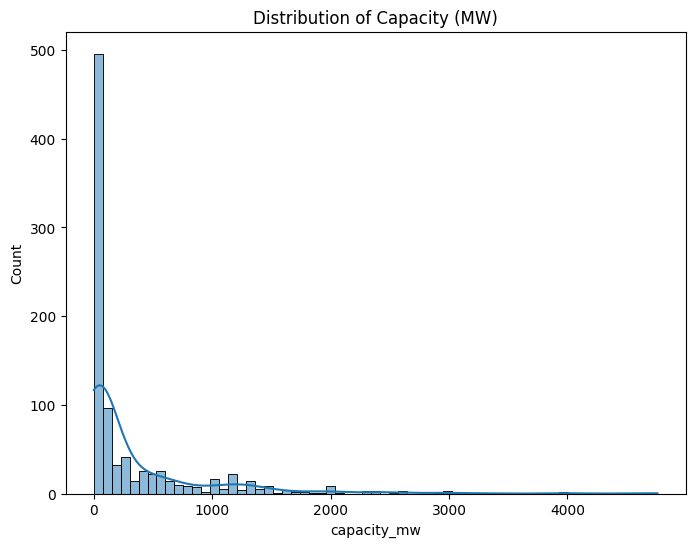

Accuracy for primary fuel prediction: 0.84
Accuracy for capacity prediction: 0.39
Mean Squared Error for capacity prediction: 2.35


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier

url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'

df = pd.read_csv(url)

df.fillna(df.mean())

# if df.empty:
#     raise ValueError("The DataFrame is empty. Check the CSV file or URL.")

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# print(df.describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['capacity_mw'], kde=True)
plt.title('Distribution of Capacity (MW)')
plt.show()

X = df.drop(['primary_fuel', 'capacity_mw'], axis=1)
y_fuel = df['primary_fuel']
df['capacity_mw_cat'] = pd.qcut(df['capacity_mw'], 10, duplicates='drop')
y_capacity = df['capacity_mw_cat']

le_capacity = LabelEncoder()
y_capacity_encoded = le_capacity.fit_transform(y_capacity)

X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X, y_fuel, test_size=0.2, random_state=42)
model = HistGradientBoostingClassifier()
model.fit(X_train_fuel, y_train_fuel)

model_fuel = HistGradientBoostingClassifier()
model_fuel.fit(X_train_fuel, y_train_fuel)


X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(
    X, y_capacity_encoded, test_size=0.2, random_state=42
)


model_capacity = HistGradientBoostingClassifier()
model_capacity.fit(X_train_capacity, y_train_capacity)
predictions_fuel = model_fuel.predict(X_test_fuel)
fuel_accuracy = accuracy_score(y_test_fuel, predictions_fuel)
print(f"Accuracy for primary fuel prediction: {fuel_accuracy:.2f}")
predictions_capacity = model_capacity.predict(X_test_capacity)
capacity_mse = mean_squared_error(y_test_capacity, predictions_capacity)
capacity_accuracy = accuracy_score(y_test_capacity, predictions_capacity)
print(f"Accuracy for capacity prediction: {capacity_accuracy:.2f}")
print(f"Mean Squared Error for capacity prediction: {capacity_mse:.2f}")



Temperature Forecast Project using ML

           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954        

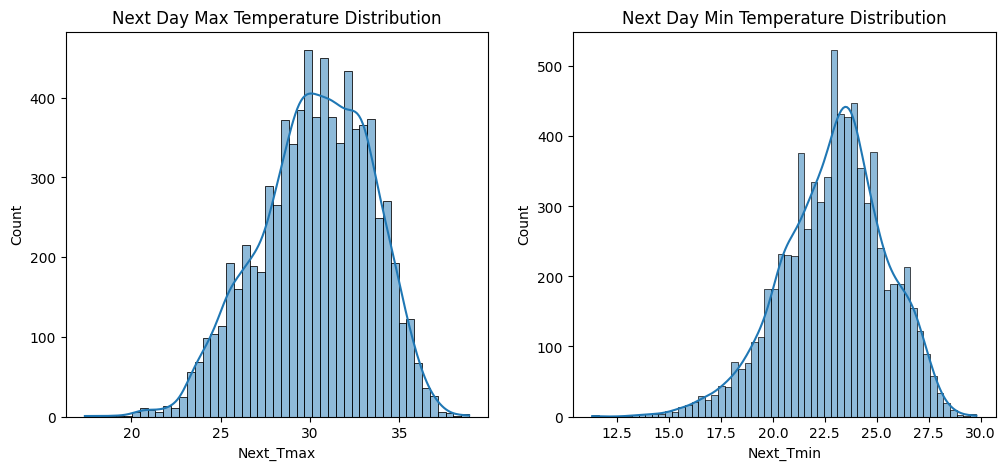

Next Day Max Temp - MSE: 0.81, RMSE: 0.90, MAE: 0.68, R²: 0.92
Next Day Min Temp - MSE: 0.56, RMSE: 0.75, MAE: 0.56, R²: 0.91


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

url = 'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
df = pd.read_csv(url)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

print(df.describe())
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Next_Tmax'], kde=True)
plt.title('Next Day Max Temperature Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Next_Tmin'], kde=True)
plt.title('Next Day Min Temperature Distribution')
plt.show()

X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']

X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)
model_max = RandomForestRegressor()
model_max.fit(X_train_max, y_train_max)

X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)
model_min = RandomForestRegressor()
model_min.fit(X_train_min, y_train_min)

predictions_max = model_max.predict(X_test_max)
mse_max = mean_squared_error(y_test_max, predictions_max)
rmse_max = sqrt(mse_max)
mae_max = mean_absolute_error(y_test_max, predictions_max)
r2_max = r2_score(y_test_max, predictions_max)

print(f"Next Day Max Temp - MSE: {mse_max:.2f}, RMSE: {rmse_max:.2f}, MAE: {mae_max:.2f}, R²: {r2_max:.2f}")
predictions_min = model_min.predict(X_test_min)
mse_min = mean_squared_error(y_test_min, predictions_min)
rmse_min = sqrt(mse_min)
mae_min = mean_absolute_error(y_test_min, predictions_min)
r2_min = r2_score(y_test_min, predictions_min)

print(f"Next Day Min Temp - MSE: {mse_min:.2f}, RMSE: {rmse_min:.2f}, MAE: {mae_min:.2f}, R²: {r2_min:.2f}")

Loan Application Status Prediction

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
df = pd.read_csv(url)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
label_encoders = {}
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').fillna(0)
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report: \n{report}")


Accuracy: 0.7560975609756098
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

